## A simple fillet in 2D 

[![Google Collab Book](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/meyer-nils/torch-fem/blob/main/examples/basic/planar/fillet.ipynb)

This example demonstrates the import of an external mesh. 

In [1]:
import torch

from torchfem.examples import get_example_file
from torchfem.io import import_mesh
from torchfem.materials import IsotropicElasticityPlaneStress

# Set double precision
torch.set_default_dtype(torch.float64)

# Material model (plane stress)
material = IsotropicElasticityPlaneStress(E=1000.0, nu=0.3)

## Import and problem setup

We import a mesh that is included in the torch-fem example data (this path may be replaced with a path to any file in a meshio compatible mesh format). In this case, the mesh represents a fillet and we impose symmetry boundary conditions at the left and bottom ends. In addition, we prescribe a displacement at the right end. 

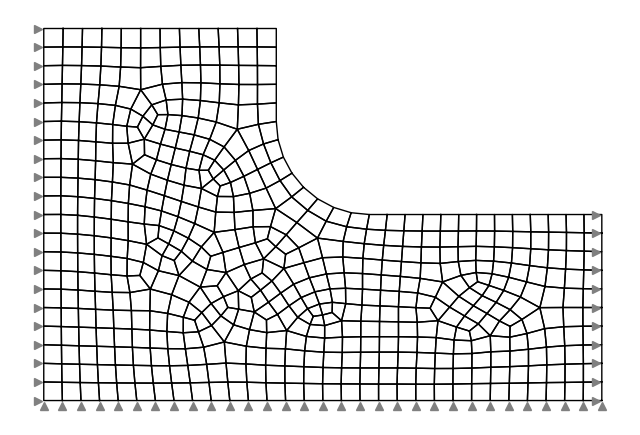

In [2]:
# Import mesh
path = get_example_file("fillet.vtu")
specimen = import_mesh(path, material)

# Symmetry nodes at left
left = specimen.nodes[:, 0] < 0.1
specimen.constraints[left, 0] = True

# Symmetry nodes at bottom
bottom = specimen.nodes[:, 1] < 0.1
specimen.constraints[bottom, 1] = True

# Displacement at right end
right = specimen.nodes[:, 0] >= specimen.nodes[:, 0].max() - 0.1
specimen.constraints[right, 0] = True
specimen.displacements[right, 0] = 6.0

# Visualize the mesh
specimen.plot()

## Solve 

In [3]:
u, f, σ, ε, α = specimen.solve()

## Postprocessing

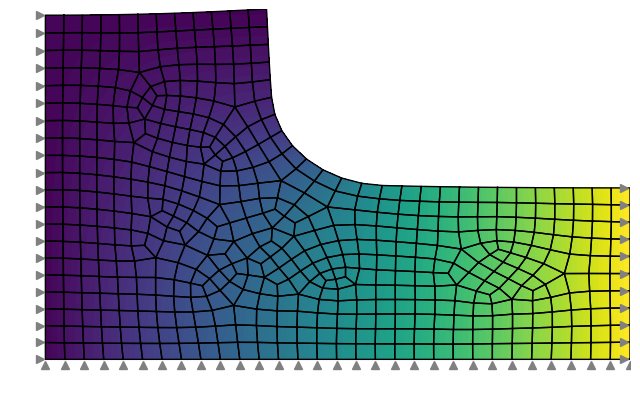

In [4]:
# Displacement field in x-direction
specimen.plot(u, node_property=u[:, 0], figsize=(8, 8))

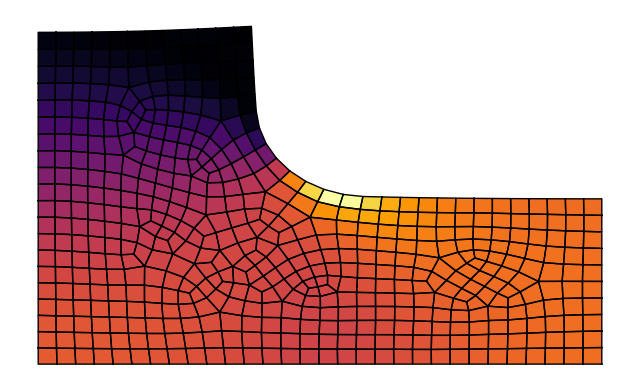

In [5]:
# Von Mises stress
mises = torch.sqrt(σ[:, 0] ** 2 - σ[:, 0] * σ[:, 1] + σ[:, 1] ** 2 + 3 * σ[:, 2] ** 2)
specimen.plot(u, bcs=False, element_property=mises, figsize=(8, 8), cmap="inferno")